No. of rows: 60 
No. of columns: 19


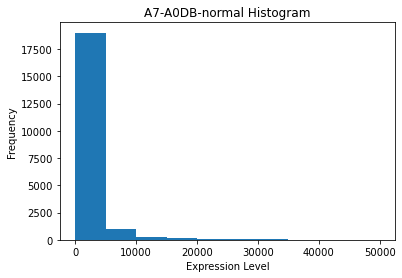

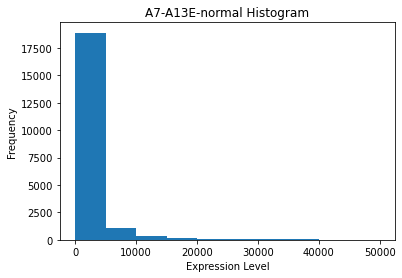

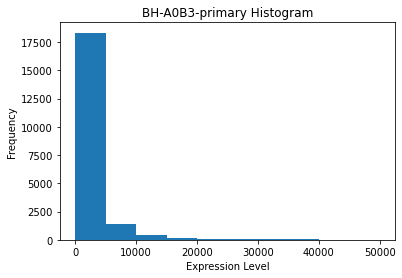

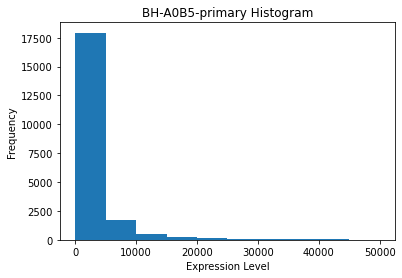

                        Mean  Median  Standard Deviation
Sample Name                                             
A7-A0CE-normal   3308.877255   814.0        12725.531516
A7-A0CH-normal   3046.316942   630.0        14145.451194
A7-A0D9-normal   2628.131550   350.0        17827.391513
A7-A0DB-normal   2354.674445   362.0        13973.914409
A7-A13E-normal   2380.702593   427.0        13373.496798
A7-A13F-normal   2493.380215   527.0        12477.592390
A7-A13G-normal   3509.542463   454.0        30474.663592
AC-A23H-normal   3396.675312   659.0        20073.855034
AC-A2FB-normal   3675.583169   792.0        15577.976864
AC-A2FF-normal   3743.660492   935.0        14827.012985
AC-A2FM-normal   2714.893663   578.0        11431.472640
BH-A0AU-normal   2436.466679   641.0         8961.357233
BH-A0AY-normal   2412.727951   567.0         9362.391989
BH-A0AZ-normal   3216.765337   836.0        10744.505522
BH-A0B3-normal   2879.876149   772.0         9737.708560
BH-A0B5-normal   3129.721455   

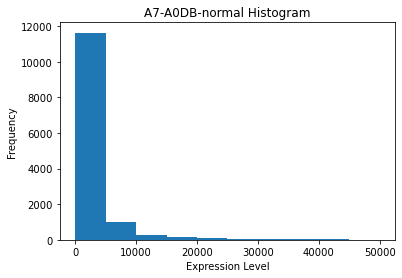

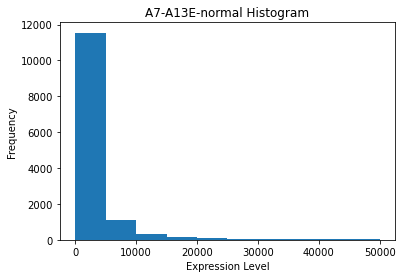

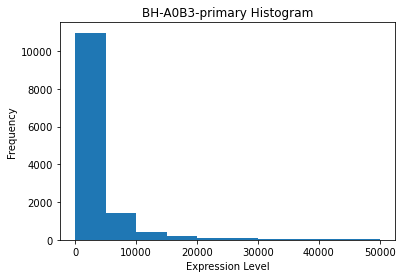

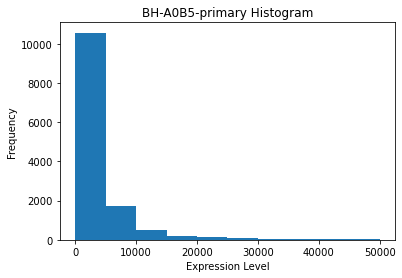

In [33]:
### AUTHOR: Razeen Khan A18321156

### import required packages (install if necessary on local devices)

import pandas as pd
import matplotlib.pyplot as plt

### Task 1

# function that reads a GenePattern .gct file using the pandas read_csv method
# returns a dataframe of the file after dropping first 2 rows and using first 2 cols as indexes
# if summary = true, no. of rows/columns will be printed

def read_gct_file(url, summary=False):
    df = pd.read_csv(url, sep="\t", skiprows=2, index_col=[0, 1])
    if summary:
       print(f"No. of rows: {df.shape[0]} \nNo. of columns: {df.shape[1]}")
    return df

### Task 2a
test_url = "https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct"
read_gct_file(test_url,summary=True)

### Task 2b
test_url_two = "https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct"
read_gct_file(test_url_two,summary=False)

### Task 3
df_two = read_gct_file(test_url_two,summary=False)

# list of specific sample names that need to be used to plot the histogram
plot_cols = ["A7-A0DB-normal","A7-A13E-normal","BH-A0B3-primary","BH-A0B5-primary"]

# iterates through the previous list
# maintains range < 50 000 and labels columns as needed 
# title of each histogram is dynamic - named appropriately for each
for col in plot_cols:
    plt.hist(df_two[col], range=(0, 50000))
    plt.title(f"{col} Histogram")
    plt.xlabel("Expression Level")
    plt.ylabel("Frequency")
    plt.show()

### Task 4

# new dataframe that holds mean, median and standard dev for each sample
# use each required method on previous df_two datafram from Task 2b
stats_df = pd.DataFrame({
    "Sample Name": df_two.columns,
    "Mean": df_two.mean(),
    "Median": df_two.median(),
    "Standard Deviation": df_two.std()
})

# use sample name as index column to prevent duplication of columns when printing the dataframe
stats_df = stats_df.set_index("Sample Name")

print(stats_df) 

### Task 5a

# filter dataframe from Task 2b by using dataframe .max method
# axis = 1 to ensure this only applies on rows, not columns
df_filtered = df_two[df_two.max(axis=1) >= 1000]

### Task 5b

# calulate the mean and median after filtering
# storing in a new dataframe for printing 
# note that the same method is used from earlier

stats_filtered = pd.DataFrame({
    "Sample Name": df_filtered.columns,
    "Mean": df_filtered.mean(),
    "Median": df_filtered.median(),
})

stats_filtered = stats_filtered.set_index("Sample Name")

print(stats_filtered)

# plotting histograms for each required sample
# using same list from earlier as samples are the same

for col in plot_cols:
    plt.hist(df_filtered[col], range=(0, 50000))
    plt.title(f"{col} Histogram")
    plt.xlabel("Expression Level")
    plt.ylabel("Frequency")
    plt.show()


    
